In [1]:
import numpy 
import math 
import sympy
from matplotlib import pyplot 
%matplotlib inline

## 1. Stability

The condition for a wave to be stable is;

$\sigma = \frac{c \Delta t}{\Delta x} <= 1$

$Therefore;$

$\Delta t <= \Delta x / c$

In [2]:
dx = 0.2  
c = 4      
dt = dx/c

print("The maximum value of Δt that will ensure the stability is;", dt)

The maximum value of Δt that will ensure the stability is; 0.05


## 2. Sympy

Using $Sympy$ evluate the partial derivative with respect to $x$ of the following eqaution at $x = 2.2$.

$\frac{\cos^2(x)sin^3(x)}{4x^5 \exp(x)}$

In [3]:
## Integration and lambdify have to imported from Sympy
from sympy import init_printing
init_printing()
from sympy.utilities.lambdify import lambdify

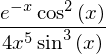

In [38]:
x = sympy.symbols('x')
u = sympy.cos(x)**2/(sympy.sin(x)**3)/(4*x**5))
u